In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/iris.csv'
df = pd.DataFrame()
try:
    df = pd.read_csv(url)
except Exception as e:
    df = pd.read_csv('iris.csv')
    print(f'An error occured {e}\nUsing local dataset')
df.to_csv('iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### Separate features and target


In [3]:
X = df.drop(columns=['species'])  # Features
y = df['species']  # Target



#### Standardize the dataset


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#### Fit Gaussian Mixture Model (GMM)


In [5]:
bic_values = []
n_components_range = range(1, 7)  # We will test 1 to 6 components


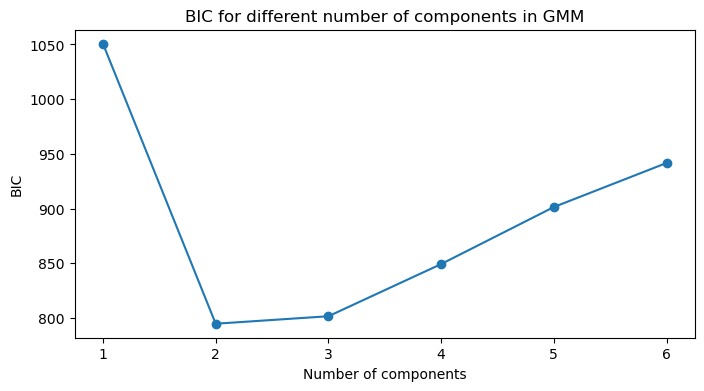

In [6]:

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X_scaled)
    bic_values.append(gmm.bic(X_scaled))

# Plot BIC to choose the best number of components
plt.figure(figsize=(8, 4))
plt.plot(n_components_range, bic_values, marker='o')
plt.title('BIC for different number of components in GMM')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.show()



#### From the BIC plot, we select the best number of components (clusters)


In [7]:
optimal_components = n_components_range[np.argmin(bic_values)]
print(f'Optimal number of components (clusters): {optimal_components}')


Optimal number of components (clusters): 2



#### Fit GMM with optimal number of components


In [8]:
gmm = GaussianMixture(n_components=optimal_components, random_state=0)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)  # Predicted cluster labels



#### Apply PCA for visualization


In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


#### Plot the clusters in the first two principal components

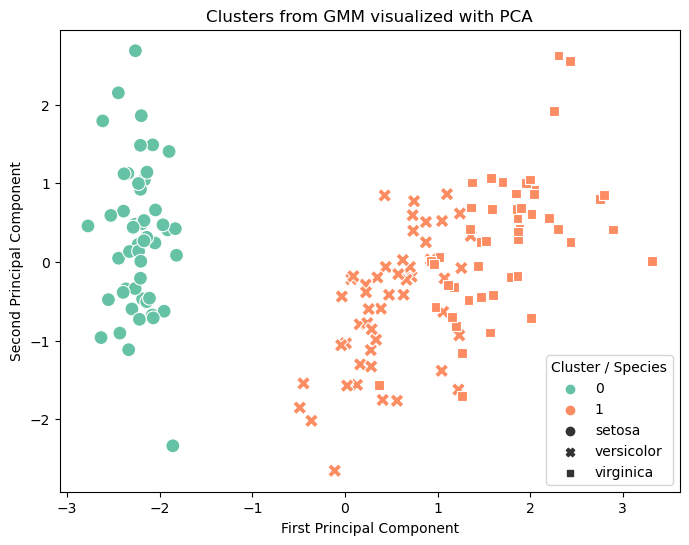

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', style=y, s=100)
plt.title(f'Clusters from GMM visualized with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Cluster / Species')
plt.show()


#### Compare the predicted clusters with actual species

In [11]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y, labels)
print(f'Adjusted Rand Index (ARI) comparing clusters with actual species: {ari:.2f}')


Adjusted Rand Index (ARI) comparing clusters with actual species: 0.57
